# Load necessary packages

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.manifold import TSNE
from scipy.stats import zscore
from os import getcwd

# Load extracted features data, perform z-score across all data

In [2]:
# Load Data of extracted features
data_path = getcwd() + '/gsif_gmr_extracted_features.csv' # presuming this is ran in the example folder
extracted_features = pd.read_csv(data_path)
extracted_features = extracted_features.dropna(axis=1)
IDs = extracted_features['ID']
densens_ids = np.array(extracted_features['Is desens'])
extracted_features_df = extracted_features.drop(columns='ID')
extracted_features_df = extracted_features_df.drop(columns='Is desens')
# Apply a zscore aacross all the data
extracted_features_df = extracted_features_df.apply(zscore,axis=1)

# Run 10-D PCA on zscored features

In [3]:
# Set values for reproducibility of others as well as defaults
random_state = 5
tsne_perplexity = 100
kmeans_n_clusters = 3
tsne_n_components = 2

# Calculate PCA on first 10 components
X=extracted_features_df.values
pca = PCA(n_components=10)
transformed = pca.fit_transform(X)

# Print information on the explained variance
print("here's the explained variance per component: ", pca.explained_variance_ratio_)
string_explained_variance = "Collectively they explained {}% of the data's variance"
print(string_explained_variance.format(str(np.round(100*sum(pca.explained_variance_ratio_),2))))

here's the explained variance per component:  [0.74743396 0.04982737 0.04336419 0.03244745 0.02635333 0.01841761
 0.01319888 0.00831304 0.00630087 0.00531175]
Collectively they explained 95.1% of the data's variance


# Do k-means clustering of 10-D PCA into 3 clusters, and perform t-SNE of 10-D PCA for visualizing of extracted_features

In [4]:
# Find k-means clusters of 10-D PCA transformed data
kmeans = KMeans(n_clusters=kmeans_n_clusters,
                random_state=random_state,
                n_init=10).fit(transformed)

# Embed 10-D PCA transformed data into t-SNE
X_embedded = TSNE(n_components=tsne_n_components,
                  learning_rate='auto',
                  random_state=random_state,
                  init='random',
                  perplexity=tsne_perplexity).fit_transform(transformed)

# Enable inline plotting within notebook, default plot settings, and set a colormap

In [5]:
%matplotlib inline
sns.set_theme(context='poster',style='ticks',palette='colorblind')
cmap = [ '#DB4325',"#57C4AD", "#EDA247"] # Colorblind friendly stop-light colors
colors_kmean = [cmap[i] for i in kmeans.labels_] # Matching colors to the cluster assignment 

# Show 2-D t-SNE of 10-D PCA data which is used in k-means clustering

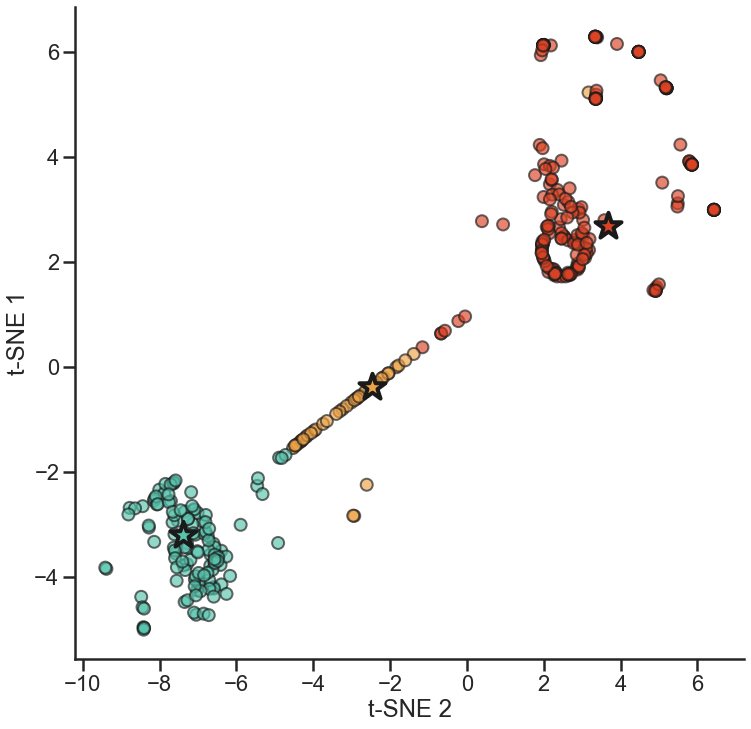

In [6]:
fig, ax = plt.subplots(ncols=1, figsize=(12,12),sharex=True,sharey=True)

# Plot every point with semi-transparency
ax.scatter(X_embedded[:,0],X_embedded[:,1], c=colors_kmean, alpha=.65,edgecolor='k')

# Find locs of examples then plot them
fcgmr = np.where(IDs=='3-10-23 Unfed Hemo +\n gsif 10^-6M segment 0')[0]
pcgmr = np.where(IDs=='4-4-23 Unfed Hemo +\n gsif 10^-6M segment 2')[0]
ncgmr = np.where(IDs=='3-14-23 Unfed Hemo +\n gsif 10^-6M segment 1')[0]

# Plot Full Coord example, '3-10-23 Unfed Hemo +\n gsif 10^-6M segment 0'
ax.scatter(x=X_embedded[fcgmr,0], 
           y=X_embedded[fcgmr,1], 
           c= "#57C4AD",
           edgecolor='k',
           lw=4, 
           alpha=1, 
           marker='*',
           s=750,
           zorder=3) #
# Plot Partial Coord Example, '4-4-23 Unfed Hemo +\n gsif 10^-6M segment 2'
ax.scatter(x=X_embedded[pcgmr,0], 
           y=X_embedded[pcgmr,1], 
           c= "#EDA247",
           edgecolor='k',
           lw=4, 
           alpha=1, 
           marker='*',
           s=750,
           zorder=3) 
# Plot No Coord Example, '3-14-23 Unfed Hemo +\n gsif 10^-6M segment 1'
ax.scatter(x=X_embedded[ncgmr,0], 
           y=X_embedded[ncgmr,1], 
           c= "#DB4325",
           edgecolor='k',
           lw=4, 
           alpha=1,
           marker='*',
           s=750,
           zorder=3) 


ax.set_xlabel('t-SNE 2')
ax.set_ylabel('t-SNE 1')
sns.despine(fig=fig)
plt.show()